# SET ENVIRONMENT

In [1]:
# allows to import own functions
import sys
import os
import re
root_project = re.findall(r'(^\S*TFM)', os.getcwd())[0]
sys.path.append(root_project)

In [2]:
import pandas as pd
from src.features.add_features import add_features
from sklearn.model_selection import  train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import residuals_plot, prediction_error, PredictionError
from yellowbrick.model_selection import validation_curve, learning_curve, feature_importances
import pickle
sns.set()

/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df_raw = pd.read_csv("../../data/processed/simulation_results_REV4.csv", nrows=5000)
df_raw.head()

,i_country,R0,Tc,Tr,omega,ind_inf_1,ind_inf_2,ind_inf_sumgrad,ind_inf_p,ind_mort_1,ind_mort_2,ind_mort_3,ind_mort_sumgrad,n_closed,react_time,total_infected,total_deceased,total_recovered
0,DJI,12.187967,1.733278,21.125133,0.197944,2.160967e+03,4757.961648,4.063839e+04,0.067606,0.353545,0.487118,3.178464,6190.5,19,20,3.023155e+09,2.439964e+09,5.834951e+08
1,KAZ,8.802094,0.776828,6.837709,0.886055,2.402667e+02,907.398367,1.574797e+03,0.000394,0.687708,2.763238,4.812301,1111.5,11,8,1.828206e+09,1.569210e+09,2.590006e+08
2,LTU,12.787478,0.195316,2.497605,0.113979,2.503724e+08,7666.911039,1.304820e+06,2692.626822,0.221513,1232.088915,0.284607,305603.0,13,15,7.511292e+09,1.664463e+09,5.846913e+09
3,DMA,16.545501,1.022406,16.916222,0.104739,1.404241e+05,50184.583240,1.678547e+06,58.666486,0.378172,0.890632,1.590765,180539.5,13,10,4.906761e+09,3.136703e+09,1.770351e+09
4,CPV,10.116505,2.062013,20.860369,0.129716,1.649600e+03,2644.412518,3.383422e+04,0.091010,0.278977,0.358051,2.099191,3457.5,8,5,5.049934e+09,3.687545e+09,1.362756e+09


In [4]:
df = add_features(df_raw)

/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
features = [
    'Tr',
    'ind_inf_1',
    'ind_inf_2',
    'ind_inf_sumgrad',
    'ind_inf_p',
    'ind_mort_1',
    'ind_mort_2',
    'ind_mort_3',
    'ind_mort_sumgrad',
    'n_closed',
    'react_time',
    'betweenness_log',
    'degree_log',
    'closeness',
    'country_pop_log',
    'country_departures_log',
    'exposed_pop_log',
    'total_deceased',
    'affected_population'
    ]

df = df[features]
df.head()

,Tr,ind_inf_1,ind_inf_2,ind_inf_sumgrad,ind_inf_p,ind_mort_1,ind_mort_2,ind_mort_3,ind_mort_sumgrad,n_closed,react_time,betweenness_log,degree_log,closeness,country_pop_log,country_departures_log,exposed_pop_log,total_deceased,affected_population
0,21.125133,2.160967e+03,4757.961648,4.063839e+04,0.067606,0.353545,0.487118,3.178464,6190.5,19,20,-6.821070,-2.569464,0.426104,13.773563,6.638568,19.800943,2.439964e+09,0.323896
1,6.837709,2.402667e+02,907.398367,1.574797e+03,0.000394,0.687708,2.763238,4.812301,1111.5,11,8,-7.093339,-1.531476,0.449393,16.721127,10.240924,22.010951,1.569210e+09,0.208307
2,2.497605,2.503724e+08,7666.911039,1.304820e+06,2692.626822,0.221513,1232.088915,0.284607,305603.0,13,15,-8.981960,-1.451434,0.448485,14.841385,8.723719,20.436248,1.664463e+09,0.220952
3,16.916222,1.404241e+05,50184.583240,1.678547e+06,58.666486,0.378172,0.890632,1.590765,180539.5,13,10,-7.675671,-2.763620,0.323615,11.181751,6.643790,15.157147,3.136703e+09,0.416386
4,20.860369,1.649600e+03,2644.412518,3.383422e+04,0.091010,0.278977,0.358051,2.099191,3457.5,8,5,-5.465003,-2.070473,0.462500,13.206276,7.631917,20.600119,3.687545e+09,0.489508


In [6]:
df.shape

(5000, 19)

In [7]:
df.isna().sum()

Tr                        0
ind_inf_1                 0
ind_inf_2                 0
ind_inf_sumgrad           0
ind_inf_p                 0
ind_mort_1                0
ind_mort_2                0
ind_mort_3                0
ind_mort_sumgrad          0
n_closed                  0
react_time                0
betweenness_log           0
degree_log                0
closeness                 0
country_pop_log           0
country_departures_log    0
exposed_pop_log           0
total_deceased            0
affected_population       0
dtype: int64

# DATA PREPARATION

In [8]:
seed = 42

df.dropna(inplace=True)

X = df.drop(['total_deceased','affected_population'], axis=1)
y = df['affected_population']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  random_state=seed)

<ipython-input-8-90a1610a9ce6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
def ResultsRegressorCV(scores):
    print(f"R2: {scores['test_r2'].mean()}, {scores['test_r2'].std()}")
    print(f"MAE: {-scores['test_neg_mean_absolute_error'].mean()}, {scores['test_neg_mean_absolute_error'].std()}")
    print(f"RMSE: {-scores['test_neg_root_mean_squared_error'].mean()}, {scores['test_neg_root_mean_squared_error'].std()}")
    return None

def make_scores(d_score, model_name):
    try:
        df = pd.read_pickle('scores_models.pkl')
        df[model_name] = list(d_score.values())
        df.to_pickle('scores_models.pkl')
    except:
        s = pd.Series(d_score)
        s.name = model_name
        df = pd.DataFrame(s)
        df.to_pickle('scores_models.pkl')

# MODEL

In [22]:
estimator = ElasticNet(fit_intercept=False)

pipe = Pipeline(
    [
        ('preprocessing', StandardScaler()),
        ("estimator", estimator),
    ]
)

In [23]:
score = cross_validate(pipe, X, y, n_jobs=-1, scoring=['r2','neg_mean_absolute_error','neg_root_mean_squared_error'])
ResultsRegressorCV(score)

R2: -0.9563978134664456, 0.06639548978815883
MAE: 0.227567793513124, 0.008068148764660823
RMSE: 0.32563926446833186, 0.006321873775631024


In [20]:
make_scores(score, 'Elastic Net')

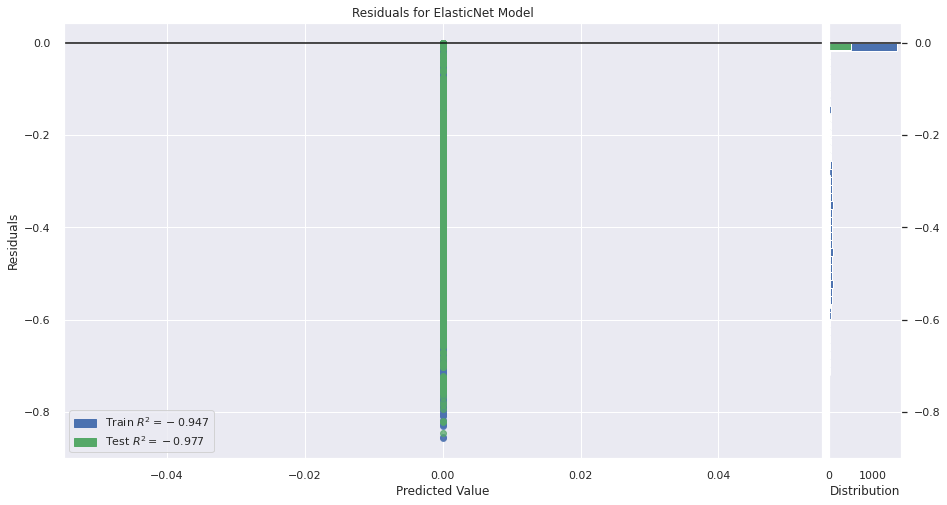

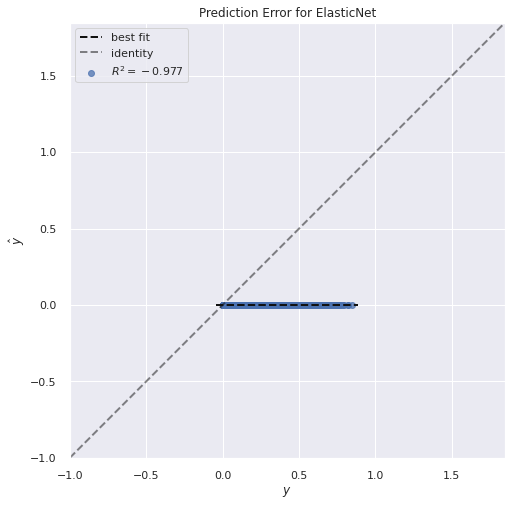

/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


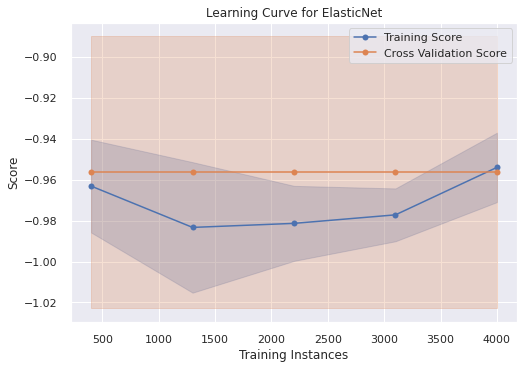

/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:205: RuntimeWarning: invalid value encountered in true_divide
  self.feature_importances_ /= maxv


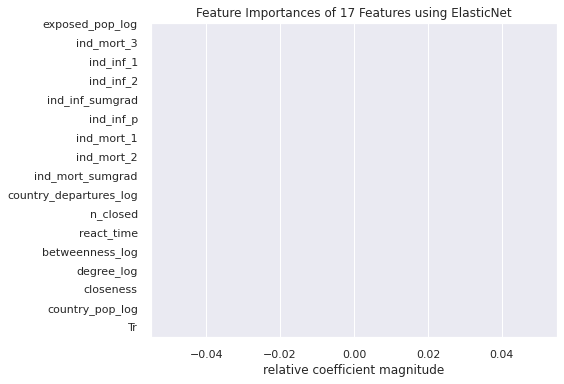

/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 17 Features using ElasticNet'}, xlabel='relative coefficient magnitude'>,
                   model=None)

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
viz = residuals_plot(pipe, X_train, y_train, X_test, y_test, ax=ax)

fig, ax = plt.subplots(1,1, figsize=(15,8))
viz = prediction_error(pipe, X_train, y_train, X_test, y_test, ax=ax)

learning_curve(pipe, X, y, scoring='r2', n_jobs=-1)

feature_importances(estimator, X, y)